https://www.sciencedirect.com/science/article/pii/S0898122112001745#br000150

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import plotly.express as ex
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
import math
import numpy as np
import seaborn as sns

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing

C:\Users\ACER\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Importing the dataset

## Data Sources:

The data is stored in data directory, containing 7 files as mentioned below:

 - amo.txt: This data series represents the mean SST of North Atlantic, i.e., within the latitude 0 °–70 °N, detrended to remove the influence of global warming. See: https://psl.noaa.gov/data/timeseries/AMO/
 - co2.txt: The long-time yearly time series of the concentration of co2
 - nao.txt: An index calculated from the measurements of air pressure at two locations: Ponta Delgada, Azores, and Stykkisholmur/Reykjavik in Iceland, see: https://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii.table
 - spot_num.txt: The number of sun spots, see http://www.sidc.be/silso/datafiles
 - sstenso.txt: Temperature fluctuations expressed by the average SST anomaly of the region 20 °N–20 °S minus 90 °N–20 °N and 20 °S–90 °S, relative to the base period 1950–1979, see: https://www.cpc.ncep.noaa.gov/data/indices/sstoi.indices
 - temp.csv: global average temperature by year, see: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data
 - volcano.csv: volcanic activities, see:

 - amo.txt: This data series represents the mean SST of North Atlantic, i.e., within the latitude 0 °–70 °N, detrended to remove the influence of global warming
 - co2.txt: The long-time yearly time series of the concentration of co2
 - nao.txt: An index calculated from the measurements of air pressure at two locations: Ponta Delgada, Azores, and Stykkisholmur/Reykjavik in Iceland
 - spot_num.txt: The number of sun spots
 - sstenso.txt: Temperature fluctuations expressed by the average SST anomaly of the region 20 °N–20 °S minus 90 °N–20 °N and 20 °S–90 °S, relative to the base period 1950–1979
 - temp.csv: global average temperature by year
 - volcano.csv: volcanic activities

## Read temperature data

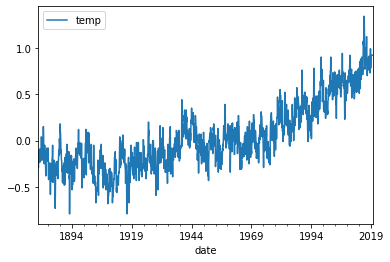

In [2]:
df_temp = pd.read_csv("data/global_surface_temperature_anomalies.csv")
df_temp['date'] = pd.to_datetime(df_temp['date'])
#df_temp.set_index('date', inplace=True)
df_temp["year"] = df_temp.date.dt.year
df_temp["month"] = df_temp.date.dt.month
df_temp['date'] = pd.to_datetime(df_temp['year'].astype(str) + '-' + df_temp['month'].astype(str))
df_temp.set_index('date', inplace=True)
df_temp = df_temp.rename(columns={"Avg_Anomaly_deg_C":"temp"})
df_temp = df_temp[["temp"]]
df_temp.dropna()
df_temp.plot()

## Read AMO data

C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


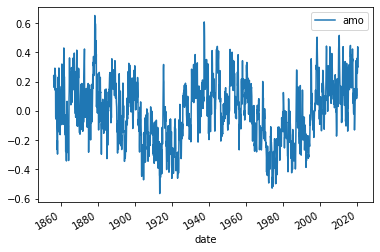

In [3]:
col_month = "Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec".split(" ")
df_amo = pd.read_csv("data/amo.txt",sep="   ",index_col=0, names = col_month) # 3 spaces
df_amo.reset_index(inplace=True)
df_amo.rename(columns={'index': 'year'}, inplace=True)
df_amo = df_amo.melt(id_vars='year', var_name='month')
df_amo['date'] = pd.to_datetime(df_amo['year'].astype(str) + '-' + df_amo['month'])
df_amo.set_index('date', inplace=True)
df_amo["value"] = pd.to_numeric(df_amo["value"],errors="coerce")
df_amo = df_amo.rename(columns={"value":"amo"})
df_amo = df_amo[["amo"]]
df_amo.dropna()
df_amo.sort_index()
df_amo.plot()

### Moving Average

In [4]:
df_amo_copy = df_amo.copy()

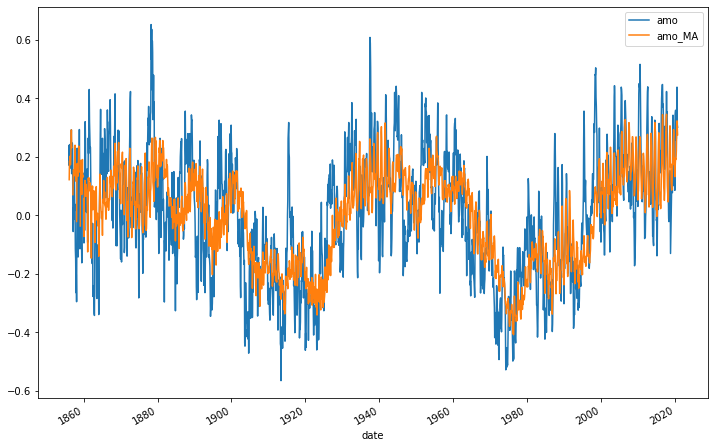

In [5]:
df_amo['amo_MA'] = df_amo['amo'].rolling(5).mean()
df_amo.plot(figsize = (12,8))

### Trend

In [6]:
df_amo = df_amo.drop('amo_MA', axis = 1)
df_amo.dropna(inplace = True)

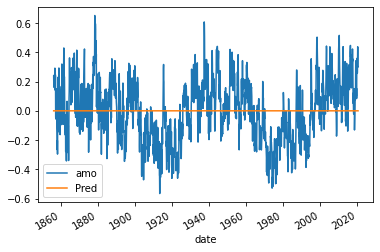

In [7]:
LR = linear_model.LinearRegression();
LR.fit(df_amo.index.values.reshape(-1, 1), df_amo['amo'])
pred = LR.predict(df_amo.index.year.values.reshape(-1, 1))
df_amo['Pred'] = pred
df_amo.plot()

### Distribution

(array([ 22., 110., 238., 346., 389., 418., 285., 129.,  34.,   7.]),
 array([-0.566 , -0.4442, -0.3224, -0.2006, -0.0788,  0.043 ,  0.1648,
         0.2866,  0.4084,  0.5302,  0.652 ]),
 <a list of 10 Patch objects>)

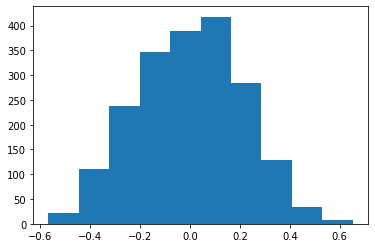

In [8]:
plt.hist(df_amo['amo'], label = 'amo')

In [9]:
df_amo = df_amo_copy.copy()

## Read CO2 data

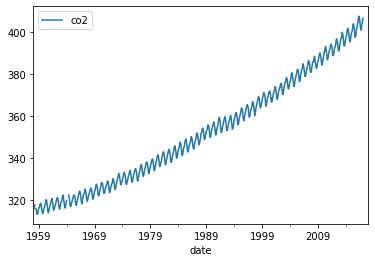

In [10]:
df_co2 = pd.read_csv("data/co2.csv")
df_co2["date"] = pd.to_datetime(df_co2["Year"].astype(str) + "-" + df_co2["Month"].astype(str))
df_co2.set_index("date", inplace=True)
df_co2 = df_co2.rename(columns={"Carbon Dioxide (ppm)":"co2"})
df_co2.co2 = pd.to_numeric(df_co2.co2)
df_co2 = df_co2[["co2"]]
df_co2.dropna()
df_co2.plot()

## Read NAO data

C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


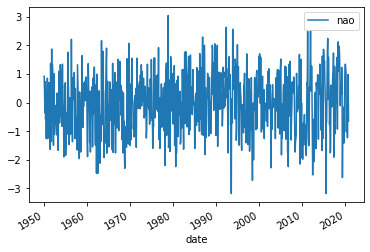

In [11]:
col_month = "Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec".split(" ")
df_nao = pd.read_csv("data/nao.txt",sep="  ",index_col=0, names = col_month) # 2 spaces
df_nao.reset_index(inplace=True)
df_nao.rename(columns={'index': 'year'}, inplace=True)
df_nao = df_nao.melt(id_vars='year', var_name='month')
df_nao['date'] = pd.to_datetime(df_nao['year'].astype(str) + '-' + df_nao['month'])
df_nao.set_index('date', inplace=True)
df_nao["value"] = pd.to_numeric(df_nao["value"],errors="coerce")
df_nao = df_nao.rename(columns={"value":"nao"})
df_nao = df_nao[["nao"]]
df_nao.dropna()
df_nao.sort_index()
df_nao.plot()

### Moving Average

In [12]:
df_nao_copy = df_nao.copy()

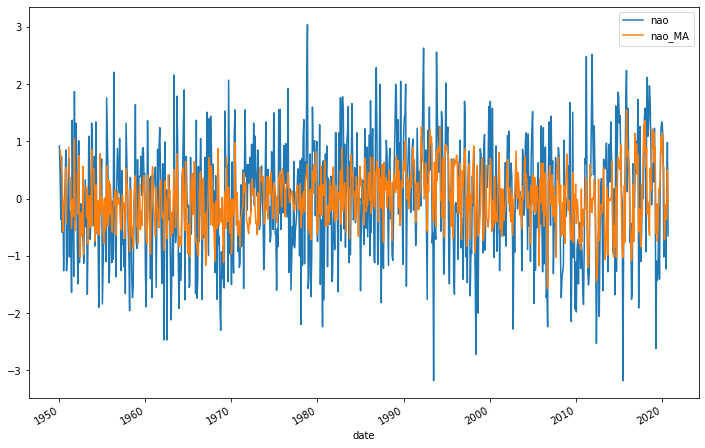

In [13]:
df_nao['nao_MA'] = df_nao['nao'].rolling(5).mean()
df_nao.plot(figsize = (12,8))

### Trend

In [14]:
df_nao = df_nao.drop('nao_MA', axis = 1)
df_nao.dropna(inplace = True)

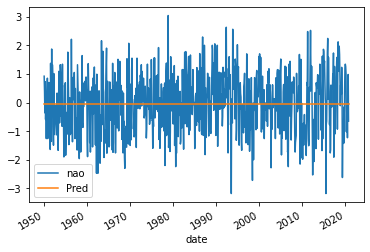

In [15]:
LR = linear_model.LinearRegression();
LR.fit(df_nao.index.values.reshape(-1, 1), df_nao['nao'])
pred = LR.predict(df_nao.index.year.values.reshape(-1, 1))
df_nao['Pred'] = pred
df_nao.plot()

### Distribution

(array([  4.,  14.,  77., 129., 166., 198., 156.,  82.,  19.,   5.]),
 array([-3.18 , -2.558, -1.936, -1.314, -0.692, -0.07 ,  0.552,  1.174,
         1.796,  2.418,  3.04 ]),
 <a list of 10 Patch objects>)

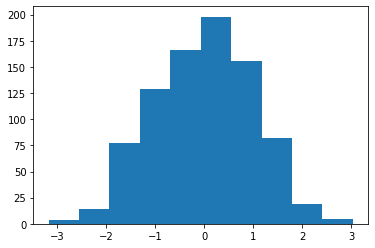

In [16]:
plt.hist(df_nao['nao'], label = 'nao')

In [17]:
df_nao = df_nao_copy.copy()

## Read Sun Spot Data

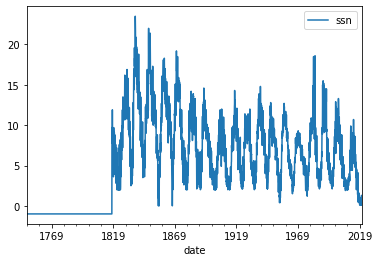

In [18]:
df_ssn = pd.read_csv("data/SN_m_tot_V2.0.csv",sep=";", index_col=2,names=["YEAR","MON","ir1","ssn","ir2","ir3"])
df_ssn["date"] = pd.to_datetime(df_ssn.YEAR.astype("str")+'-'+df_ssn.MON.astype(str))
df_ssn.set_index('date', inplace=True)
df_ssn.rename(columns={'SSN': 'ssn'}, inplace=True)
df_ssn["ssn"] = pd.to_numeric(df_ssn["ssn"],errors="coerce")
df_ssn = df_ssn[["ssn"]]
df_ssn.plot()

## Read ENSO data

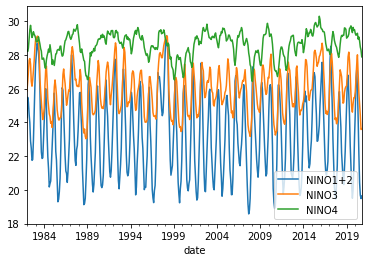

In [19]:
df_enso = pd.read_csv("data/sstenso.txt",sep=" ")

df_enso["date"] = pd.to_datetime(df_enso.YR.astype("str")+'-'+df_enso.MON.astype(str))
df_enso.set_index('date', inplace=True)
df_enso = df_enso[["NINO1+2","NINO3","NINO4"]]
df_enso[["NINO1+2","NINO3","NINO4"]] = df_enso[["NINO1+2","NINO3","NINO4"]].apply(pd.to_numeric,errors="coerce")
df_enso.plot()

### Moving Average

In [20]:
df_enso_copy = df_enso.copy()

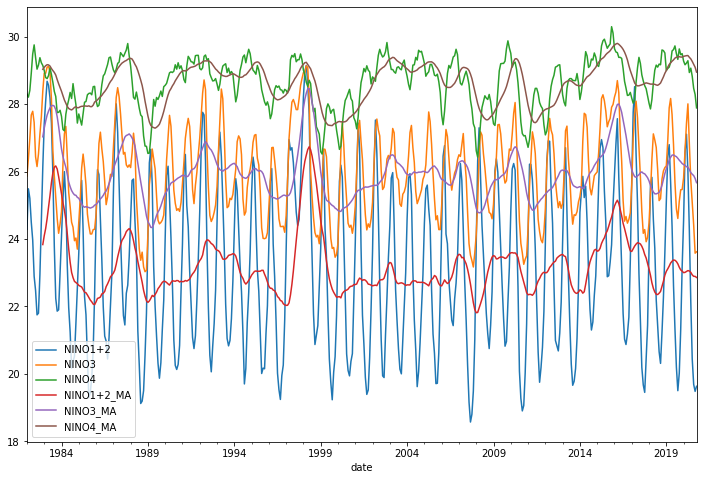

In [21]:
df_enso['NINO1+2_MA'] = df_enso['NINO1+2'].rolling(12).mean()
df_enso['NINO3_MA'] = df_enso['NINO3'].rolling(12).mean()
df_enso['NINO4_MA'] = df_enso['NINO4'].rolling(12).mean()
df_enso.plot(figsize = (12,8))

### Trend

In [22]:
df_enso = df_enso.drop(['NINO1+2_MA','NINO3_MA','NINO4_MA'], axis = 1)

In [23]:
LR1 = linear_model.LinearRegression()
LR2 = linear_model.LinearRegression()
LR3 = linear_model.LinearRegression()
LR1.fit(df_enso.index.values.reshape(-1, 1), df_enso['NINO1+2'])
LR2.fit(df_enso.index.values.reshape(-1, 1), df_enso['NINO3'])
LR3.fit(df_enso.index.values.reshape(-1, 1), df_enso['NINO4'])
pred1 = LR1.predict(df_enso.index.year.values.reshape(-1, 1))
pred2 = LR2.predict(df_enso.index.year.values.reshape(-1, 1))
pred3 = LR3.predict(df_enso.index.year.values.reshape(-1, 1))

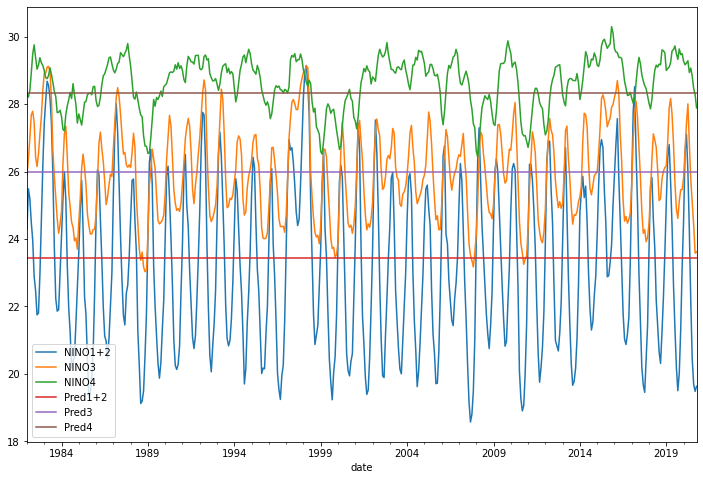

In [24]:
df_enso['Pred1+2'] = pred1
df_enso['Pred3'] = pred2
df_enso['Pred4'] = pred3
df_enso.plot(figsize = (12,8))

### Distribution

(array([21., 65., 72., 67., 50., 61., 57., 49., 16.,  8.]), array([18.57 , 19.628, 20.686, 21.744, 22.802, 23.86 , 24.918, 25.976,
       27.034, 28.092, 29.15 ]), <a list of 10 Patch objects>)
(array([17., 32., 68., 66., 71., 73., 60., 41., 25., 13.]), array([23.03 , 23.641, 24.252, 24.863, 25.474, 26.085, 26.696, 27.307,
       27.918, 28.529, 29.14 ]), <a list of 10 Patch objects>)
(array([ 11.,  13.,  25.,  39.,  67.,  71.,  99., 107.,  31.,   3.]), array([26.43 , 26.817, 27.204, 27.591, 27.978, 28.365, 28.752, 29.139,
       29.526, 29.913, 30.3  ]), <a list of 10 Patch objects>)


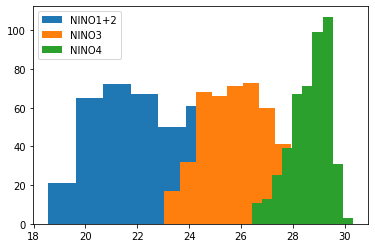

In [25]:
print(plt.hist(df_enso['NINO1+2'], label = "NINO1+2"))
print(plt.hist(df_enso['NINO3'], label = "NINO3"))
print(plt.hist(df_enso['NINO4'], label = "NINO4"))
plt.legend()

In [26]:
df_enso = df_enso_copy.copy()

## Read Volcanic data

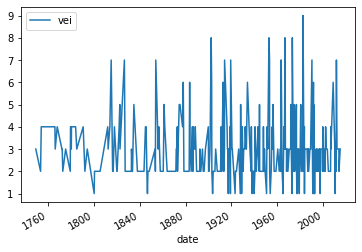

In [27]:
df_vol = pd.read_csv("data/volcano.csv",sep=";")
df_vol = df_vol[~df_vol["Month"].isna()]
df_vol = df_vol[df_vol["Year"]>=1749]

df_vol = df_vol[df_vol["Volcano Explosivity Index (VEI)"] > 0]
df_vol = df_vol.rename(columns={"Volcano Explosivity Index (VEI)":"vei"})
# df_vol["date"] = pd.to_datetime(df_vol.Year.astype(str)+'-'+df_vol.Month.astype(int).astype(str),errors="coerce")
df_vol_group = df_vol.groupby(["Year", "Month"])["vei"].sum().reset_index()
df_vol_group["date"] = pd.to_datetime(df_vol_group.Year.astype(str)+'-'+df_vol_group.Month.astype(int).astype(str))
df_vol_group.set_index("date",inplace=True)
df_vol_group = df_vol_group[["vei"]]
df_vol_group.plot()

# Merge Data

In [28]:
df = df_temp.join(df_amo,how="outer")
df = df.join(df_co2,how="outer")
df = df.join(df_enso,how="outer")
df = df.join(df_nao,how="outer")
df = df.join(df_vol_group,how="outer")
df = df.join(df_ssn,how="outer")
df


,temp,amo,co2,NINO1+2,NINO3,NINO4,nao,vei,ssn
date,,,,,,,,,
1749-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1749-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1749-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1749-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1749-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
...,...,...,...,...,...,...,...,...,...
2020-08-01,NaN,0.438,NaN,19.69,24.42,28.47,0.12,NaN,1.3
2020-09-01,NaN,0.309,NaN,19.48,23.58,28.29,0.98,NaN,0.3
2020-10-01,NaN,0.301,NaN,19.63,23.62,27.89,-0.65,NaN,1.2


In [29]:
#reload_data = False

#data_store = pd.HDFStore('data/processed_data.h5')
#if reload_data:
#    data_store['df'] = df
#else:
#    df = data_store['df']
#data_store.close()


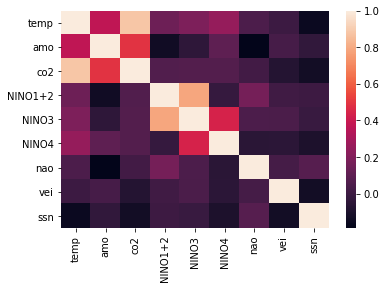

In [30]:
sns.heatmap(df.corr())

# PCA

Split dataset and use IterativeImputer to fill missing data:

In [31]:
train_set = df.loc[df.index<"2010-01-01"]
test_set = df.loc[df.index>="2010-01-01"]
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=0)
train_set = pd.DataFrame(data = imputer.fit_transform(train_set), columns = df.columns)
test_set = pd.DataFrame(data = imputer.fit_transform(test_set), columns = df.columns)

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [32]:
train_set['date'] = df.loc[df.index<"2010-01-01"].index
test_set['date'] = df.loc[df.index>="2010-01-01"].index
train_set.set_index('date', inplace = True)
test_set.set_index('date', inplace = True)
train_set.head()

,temp,amo,co2,NINO1+2,NINO3,NINO4,nao,vei,ssn
date,,,,,,,,,
1749-01-01,-0.003531,-0.028795,334.100777,22.087079,25.720079,28.740057,-0.287875,3.291339,-1.0
1749-02-01,-0.003531,-0.028795,334.100777,22.087079,25.720079,28.740057,-0.287875,3.291339,-1.0
1749-03-01,-0.003531,-0.028795,334.100777,22.087079,25.720079,28.740057,-0.287875,3.291339,-1.0
1749-04-01,-0.003531,-0.028795,334.100777,22.087079,25.720079,28.740057,-0.287875,3.291339,-1.0
1749-05-01,-0.003531,-0.028795,334.100777,22.087079,25.720079,28.740057,-0.287875,3.291339,-1.0


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_set)
scaled_train = scaler.transform(train_set)
scaled_test = scaler.transform(test_set)

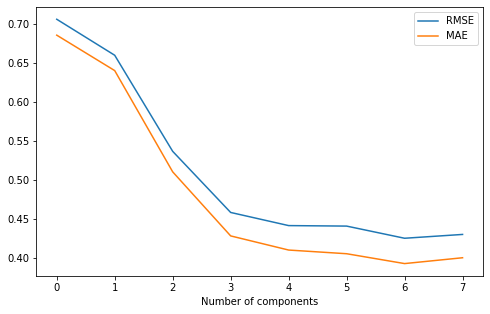

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
RMSE_list = []
MSE_list = []
MAE_list = []
r2_list = []
for i in range (1, 9):
    pca = PCA(n_components = i)
    pca.fit(scaled_train)
    reduced_train = pca.transform(scaled_train)
    reduced_test = pca.transform(scaled_test)
    Norm_train = preprocessing.normalize(reduced_train)
    Norm_test = preprocessing.normalize(reduced_test)
    LR = linear_model.LinearRegression()
    LR.fit(Norm_train, train_set.iloc[:,0])
    predictions = LR.predict(Norm_test)
    MSE_list.append(mean_squared_error(test_set.iloc[:,0], predictions))
    MAE_list.append(mean_absolute_error(test_set.iloc[:,0], predictions))
    RMSE_list.append(np.sqrt(mean_squared_error(test_set.iloc[:,0], predictions)))
    r2_list.append(r2_score(test_set.iloc[:,0], predictions))

#print(RMSE_list)
plt.figure(figsize = (8, 8*0.618))
plt.plot(RMSE_list, label = 'RMSE')
plt.plot(MAE_list, label = 'MAE')
plt.xlabel('Number of components')
plt.legend()
plt.show()

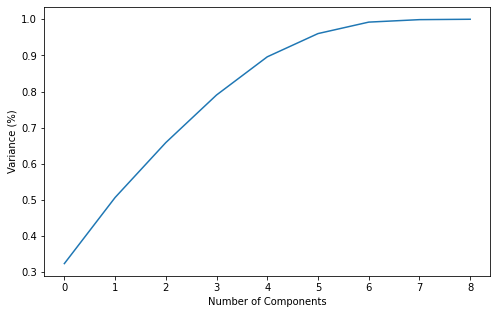

In [35]:
pca = PCA().fit(scaled_train)
plt.figure(figsize = (8, 8*0.618))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()

We can see that PCA start with 4 components capture quite enough chracteristics from the data

# Testing FBprophet

In [36]:
df_copy = df.copy()
df_copy.reset_index(inplace=True)
df_copy = df_copy.rename(columns={"date":"ds","temp":"y"})
df_copy = df_copy[df_copy.ds >= "1984-01-01"]
df_copy["vei"] = df_copy["vei"].fillna(0)
# predict the last 10 years
df_copy.dropna(inplace=True)
df_train = df_copy.loc[df_copy["ds"]<"2010-01-01"]
df_test  = df_copy.loc[df_copy["ds"]>="2010-01-01"]


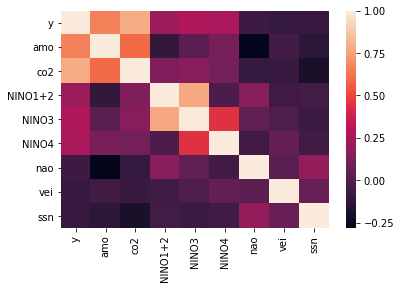

In [37]:
sns.heatmap(df_copy.corr())

In [53]:
# https://github.com/facebook/prophet/issues/792
from fbprophet import Prophet
from dateutil.easter import easter
m = Prophet(changepoint_prior_scale=0.211)
m.add_regressor("amo")
m.add_regressor("co2")
m.add_regressor("NINO1+2")
m.add_regressor("NINO3", prior_scale=9.8)
m.add_regressor("NINO4")
m.add_regressor("nao")
m.add_regressor("vei", prior_scale=9.8)
m.fit(df_train)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\ACER\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [40]:
forecast = m.predict(df_test.drop(columns="y"))

In [42]:
forecast[['yhat','NINO1+2',"amo","co2","NINO1+2","NINO3","NINO4","nao","vei"]]

,yhat,NINO1+2,amo,co2,NINO1+2,NINO3,NINO4,nao,vei
0,0.726995,0.025631,0.010430,1.196008,0.025631,-0.002452,0.060116,0.001208,-0.006511
1,0.801696,0.043971,0.059565,1.271903,0.043971,-0.003962,0.033972,0.002085,0.001243
2,0.838048,0.046300,0.098731,1.318838,0.046300,-0.005842,0.040986,0.000976,-0.003926
3,0.847374,0.043535,0.147866,1.387244,0.043535,-0.006829,0.043536,0.000814,0.001243
4,0.782673,0.017771,0.159972,1.429186,0.017771,-0.003500,0.029508,0.001591,-0.001342
...,...,...,...,...,...,...,...,...,...
81,0.881705,-0.027352,0.131488,1.842614,-0.027352,0.004206,-0.019592,-0.000325,0.001243
82,0.941665,-0.020074,0.135048,1.949467,-0.020074,0.003867,-0.018954,0.000249,0.001243
83,0.884071,0.004234,0.115465,1.994904,0.004234,0.003250,-0.013853,-0.000396,0.001243
84,0.984845,0.039168,0.076300,2.070799,0.039168,0.000692,-0.024693,-0.000396,0.001243


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
def evaluate(y_pred,y_true):
    errors = abs(y_pred - y_true)
    print('Model Performance')
    print('RMSE: {:0.6f}'.format(mean_squared_error(y_pred, y_true)))
    print('MAE: {:0.6f}'.format(mean_absolute_error(y_pred, y_true)))
    print("Pearson correlation: {:0.6f}".format(pearsonr(y_pred,y_true)[0]))
    print("Correlation coefficient: {:0.6f}".format(abs(1 - pearsonr(y_pred,y_true)[0])))


evaluate(forecast.yhat,df_test.y)

Model Performance
RMSE: 0.011557
MAE: 0.083600
Pearson correlation: 0.825652
Correlation coefficient: 0.174348


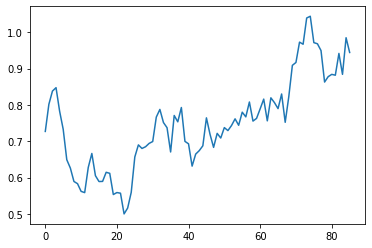

In [44]:
forecast['yhat'].plot()

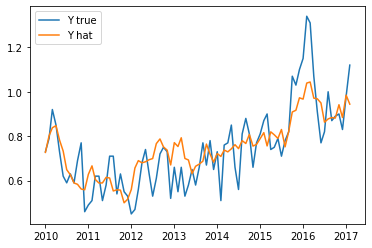

In [45]:
x = df_test.ds
plt.plot(x, df_test.y)
plt.plot(x, forecast.yhat)
plt.legend(["Y true","Y hat"])
plt.show()

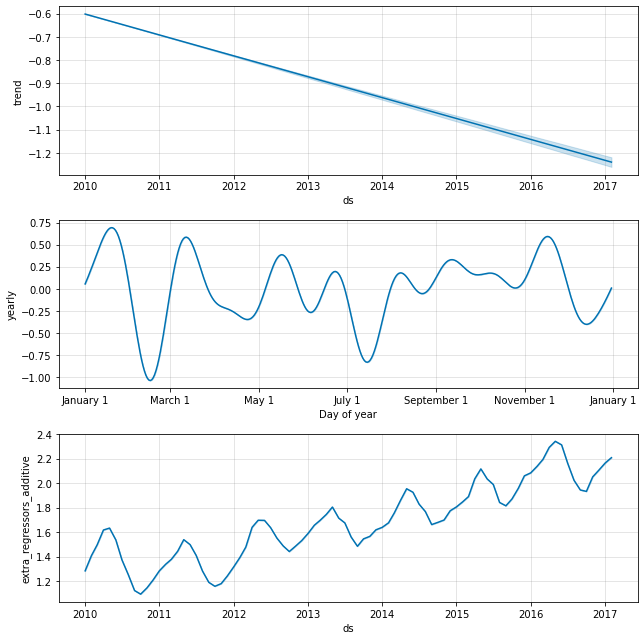

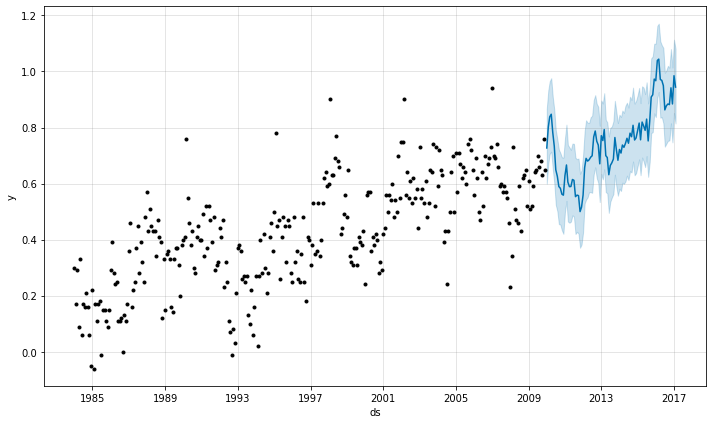

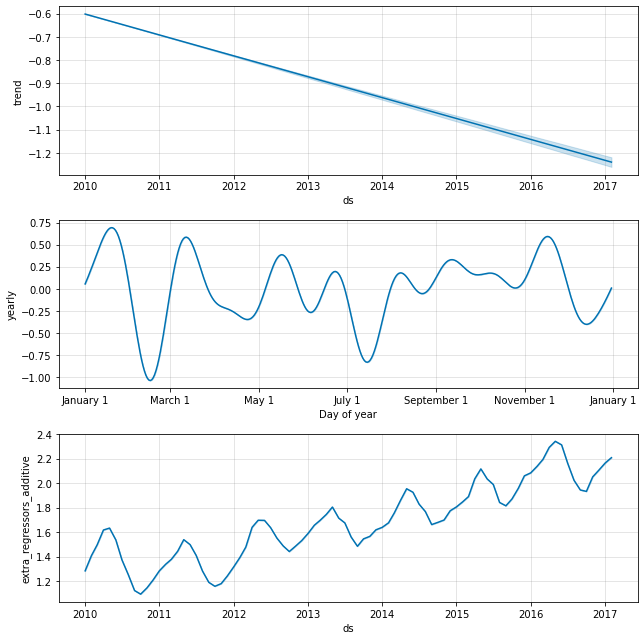

In [46]:
m.plot(forecast)
m.plot_components(forecast)

# Cross Validation

In [47]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

INFO:fbprophet:Making 47 forecasts with cutoffs between 1986-04-01 00:00:00 and 2008-12-01 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
C:\Users\ACER\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\ACER\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\ACER\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.


C:\Users\ACER\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\ACER\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\ACER\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\ACER\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype fr

,horizon,mse,rmse,mae,mdape,coverage
0,37 days,0.022770,0.150896,0.112031,0.147701,0.625000
1,39 days,0.022802,0.151003,0.112332,0.147701,0.625000
2,40 days,0.022241,0.149134,0.109761,0.147701,0.642857
3,41 days,0.020846,0.144380,0.105421,0.144363,0.672619
4,42 days,0.019663,0.140226,0.103234,0.144363,0.669643


In [50]:
df_p.head(15)

,horizon,mse,rmse,mae,mdape,coverage
0,37 days,0.022770,0.150896,0.112031,0.147701,0.625000
1,39 days,0.022802,0.151003,0.112332,0.147701,0.625000
2,40 days,0.022241,0.149134,0.109761,0.147701,0.642857
3,41 days,0.020846,0.144380,0.105421,0.144363,0.672619
4,42 days,0.019663,0.140226,0.103234,0.144363,0.669643
5,43 days,0.018671,0.136643,0.100709,0.143966,0.678571
6,45 days,0.020137,0.141906,0.104109,0.144363,0.660714
7,46 days,0.021110,0.145291,0.106619,0.143028,0.654762
8,47 days,0.020927,0.144662,0.106213,0.143028,0.654762
9,48 days,0.020753,0.144058,0.105420,0.143028,0.660714


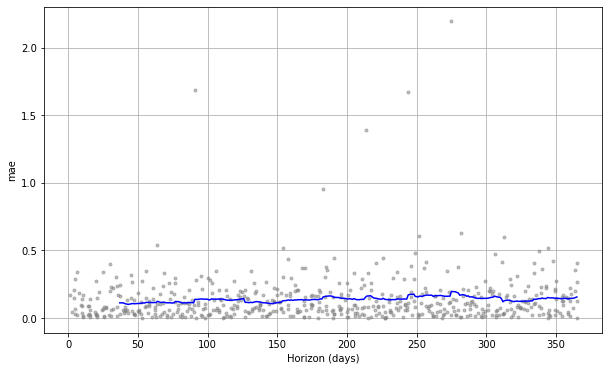

In [48]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

# Hyperparameter tuning

In [ ]:
#This cell take really long time to run. However, the error did not improve much as I remembered.
import itertools
import numpy as np
import pandas as pd
#from dask.distributed import Client

#client = Client()

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_train)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

In [49]:

from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
def find_param():
    def run(param2, param3):
        from fbprophet import Prophet
        from dateutil.easter import easter
        m = Prophet(changepoint_prior_scale=0.211)
        m.add_regressor("amo")
        m.add_regressor("co2")
        m.add_regressor("NINO1+2")
        m.add_regressor("NINO3", prior_scale=param2)
        m.add_regressor("NINO4")
        m.add_regressor("nao")
        m.add_regressor("vei", prior_scale=param3)
        m.fit(df_train)
        forecast = m.predict(df_test.drop(columns="y"))
        return mean_squared_error(forecast.yhat,df_test.y), mean_absolute_error(forecast.yhat,df_test.y)

    param3 = 0.1
    param_rmse_min = 0.01
    param_mae_min = 0.01
    rmse_min = 10
    mae_min = 10
    min_ = 10
    for param2 in (np.arange(1000)/100)[1:]:
        param3 = param2
        rmse, mae = run(param2, param3)
        if mae < mae_min:
            mae_min = mae
            param_mae_min = param2
        if rmse < rmse_min:
            rmse_min = rmse
            param_rmse_min = param3
        print("param2 =", param2)
    print("param2 =", param_rmse_min, "rmse =", rmse_min)
    print("param3 =", param_mae_min, "mae =", mae_min)
#find_param()